In [4]:
!pip install ucimlrepo 

from ucimlrepo import fetch_ucirepo ,list_available_datasets
import pandas as pd
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

# combined data of features and targets 
cen_inc =  adult.data.original

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [5]:
# Import other libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer



import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 


In [6]:
# clean income column
cen_inc['income'] = cen_inc['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
cen_inc.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [7]:
cen_inc.rename(columns = {'education-num':'education_num', 'marital-status': 'marital_status', 'capital-gain' : 'capital_gain','capital-loss':'capital_loss','native-country': 'native_country', 'hours-per-week':'hours_per_week'},inplace = True)
cen_inc

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [8]:
cen_inc = cen_inc.replace('?',np.nan)
cen_inc

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [9]:
# encoding values 
from sklearn.preprocessing import LabelEncoder
encode_columns = ['workclass','marital_status','occupation','relationship','race','sex','native_country']

# unicode income
cen_inc['income'] = cen_inc['income'].replace({'>50K':1, '<=50K':0})

for column in encode_columns:
 cen_inc[column+'_enc'] = LabelEncoder().fit_transform(cen_inc[column])

In [10]:
cen_inc['workclass'].value_counts()


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [11]:
cen_inc.isnull().sum()

age                      0
workclass             2799
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            2809
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         857
income                   0
workclass_enc            0
marital_status_enc       0
occupation_enc           0
relationship_enc         0
race_enc                 0
sex_enc                  0
native_country_enc       0
dtype: int64

In [12]:

# Impute numerical columns (Age, Income) with median 
num_imputer = SimpleImputer(strategy='median') 
cen_inc[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] = num_imputer.fit_transform(cen_inc[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']])

#  ### Part 1: Impute Missing Occupation ###

# # Separate rows with missing 'occupation' 
missing_occ = cen_inc[cen_inc['occupation'].isna()] 
not_missing_occ = cen_inc[cen_inc['occupation'].notna()]

# # Label encode 'Occupation' for rows without missing values
le_occ = LabelEncoder()
not_missing_occ['Occ_Enc'] = le_occ.fit_transform(not_missing_occ['occupation'])

# # Features (excluding 'occupation') and target ('Occ_Enc')
X_occ = not_missing_occ[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
y_occ = not_missing_occ['Occ_Enc']   

# Train Random Forest Classifier for 'occupation' 
rf_classifier_occ = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_classifier_occ.fit(X_occ[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']], y_occ) 

# Predict missing 'occupation' for rows with missing values
X_missing_occ = missing_occ[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
missing_occ_pred = rf_classifier_occ.predict(X_missing_occ[['education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']]) 

# Decode predicted 'occupation' back to original categories 
missing_occ['Occ_Predicted'] = le_occ.inverse_transform(missing_occ_pred)

# Fill missing 'occupation' with predicted values 
cen_inc.loc[cen_inc['occupation'].isna(), 'occupation'] = missing_occ['Occ_Predicted']

#cen_inc['Occ_Predicted'].value_counts()


In [13]:
cen_inc['occupation'].value_counts()

occupation
Prof-specialty       6445
Craft-repair         6442
Exec-managerial      6298
Adm-clerical         6110
Sales                5890
Other-service        5510
Machine-op-inspct    3130
Transport-moving     2441
Handlers-cleaners    2218
Farming-fishing      1594
Tech-support         1477
Protective-serv      1008
Priv-house-serv       263
Armed-Forces           16
Name: count, dtype: int64

In [14]:

# Impute numerical columns with median 
num_imputer = SimpleImputer(strategy='median') 
cen_inc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] = num_imputer.fit_transform(cen_inc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']])

#  ### Part 1: Impute Missing workclass ###

# # Separate rows with missing 'workclass' 
missing_wc = cen_inc[cen_inc['workclass'].isna()] 
not_missing_wc = cen_inc[cen_inc['workclass'].notna()]

# # Label encode 'workclass' for rows without missing values
le_wc = LabelEncoder()
not_missing_wc['wc_Enc'] = le_wc.fit_transform(not_missing_wc['workclass'])

# # Features (excluding 'workplace') and target ('wc_Enc')
X_wc = not_missing_wc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
y_wc = not_missing_wc['wc_Enc']   


# Train Random Forest Classifier for 'workclass' 
rf_classifier_wc = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_classifier_wc.fit(X_wc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']], y_wc) 

# # Predict missing 'workclass' for rows with missing values
X_missing_wc = missing_wc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
missing_wc_pred = rf_classifier_wc.predict(X_missing_wc[['occupation_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']]) 

# Decode predicted 'workclass' back to original categories 
missing_wc['wc_Predicted'] = le_wc.inverse_transform(missing_wc_pred)

# # Fill missing 'workclass' with predicted values 
cen_inc.loc[cen_inc['workclass'].isna(), 'workclass'] = missing_wc['wc_Predicted']


In [15]:
cen_inc['workclass'].value_counts()

workclass
Private             35579
Self-emp-not-inc     3941
Local-gov            3198
State-gov            1994
Self-emp-inc         1709
Federal-gov          1438
Never-worked          961
Without-pay            22
Name: count, dtype: int64

In [16]:
cen_inc['native_country'].value_counts()

native_country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [17]:

# Impute numerical columns with median 
#num_imputer = SimpleImputer(strategy='median') 
cen_inc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] = num_imputer.fit_transform(cen_inc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']])

#  ### Part 1: Impute Missing country ###

# # Separate rows with missing 'country' 
missing_nc = cen_inc[cen_inc['native_country'].isna()] 
not_missing_nc = cen_inc[cen_inc['native_country'].notna()]

# # Label encode 'native_country' for rows without missing values
le_nc = LabelEncoder()
not_missing_nc['nc_Enc'] = le_nc.fit_transform(not_missing_nc['native_country'])

# # Features (excluding 'native_country') and target ('nc_Enc')
X_nc = not_missing_nc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
y_nc = not_missing_nc['nc_Enc']   


# Train Random Forest Classifier for 'native_country' 
rf_classifier_nc = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_classifier_nc.fit(X_nc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']], y_nc) 

# # Predict missing 'native_country' for rows with missing values
X_missing_nc = missing_nc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']] 
missing_nc_pred = rf_classifier_nc.predict(X_missing_nc[['occupation_enc','workclass_enc','education_num','sex_enc','marital_status_enc','age','relationship_enc','race_enc','hours_per_week','capital_gain','capital_loss','income']]) 

# Decode predicted 'native_country' back to original categories 
missing_nc['nc_Predicted'] = le_nc.inverse_transform(missing_nc_pred)

# # Fill missing 'native_country' with predicted values 
cen_inc.loc[cen_inc['native_country'].isna(), 'native_country'] = missing_nc['nc_Predicted']

In [18]:
cen_inc['native_country'].value_counts()

native_country
United-States                 44594
Mexico                          969
Philippines                     321
Germany                         206
Puerto-Rico                     184
Canada                          182
India                           164
El-Salvador                     156
Cuba                            138
China                           134
England                         127
South                           122
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            96
Vietnam                          91
Guatemala                        88
Poland                           87
Columbia                         85
Haiti                            75
Taiwan                           67
Portugal                         67
Iran                             61
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [19]:
# encoding values 
from sklearn.preprocessing import LabelEncoder
encode_columns = ['workclass','occupation','native_country']

for column in encode_columns:
 cen_inc[column+'_enc'] = LabelEncoder().fit_transform(cen_inc[column])

In [22]:
cen_inc['Capital_New'] = cen_inc['capital_gain'] + cen_inc['capital_loss']

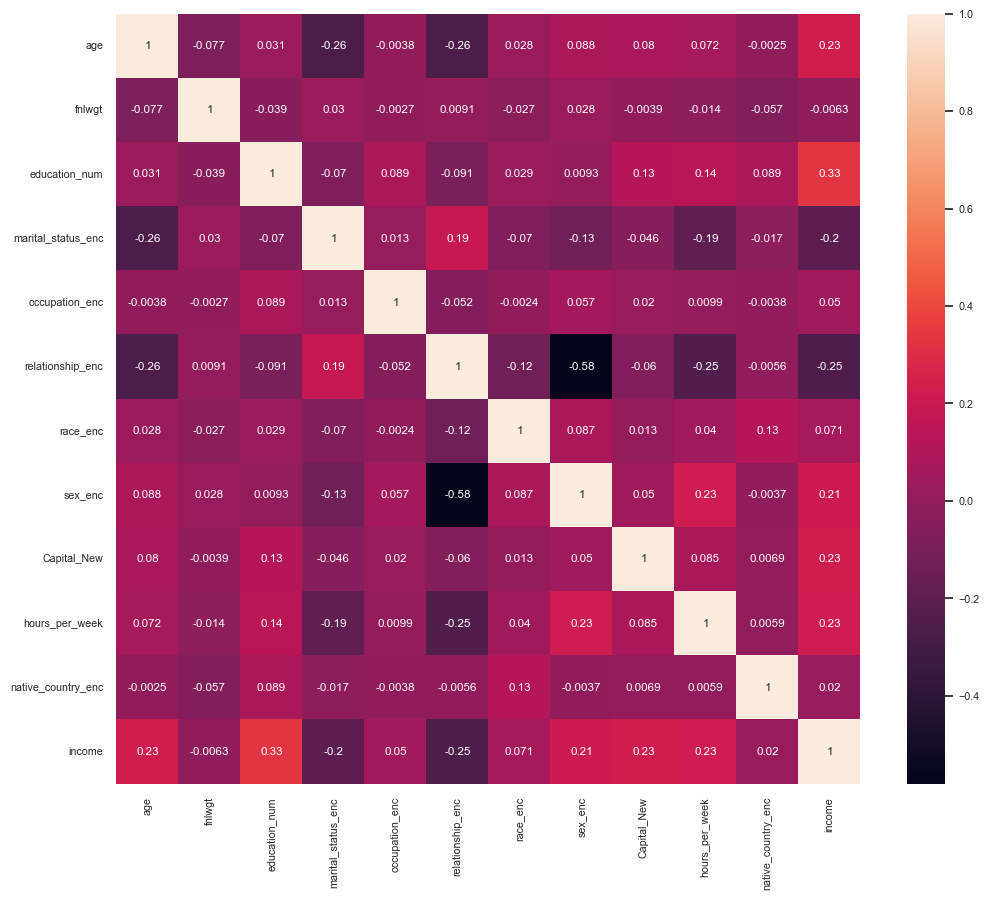

In [23]:
#corr_matrix = cen_inc[['age','workclass_enc','fnlwgt','education_num','marital_status_enc','occupation_enc','relationship_enc','race_enc','sex_enc','capital_gain','capital_loss','hours_per_week','native_country_enc','income']]
corr_matrix = cen_inc[['age','fnlwgt','education_num','marital_status_enc','occupation_enc','relationship_enc','race_enc','sex_enc','Capital_New','hours_per_week','native_country_enc','income']]
corr_matrix.corr
#sns.heatmap(corr_matrix.corr());
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.7)
sns.heatmap(corr_matrix.corr(), annot=True)
plt.show()